In [72]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report,f1_score,r2_score, mean_squared_error
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.svm import SVC

In [40]:
data = pd.read_csv('H:\DATA\MY\practice\Practice-30\Financial Distress.csv')
data.head()

,Company,Time,Financial Distress,x1,x2,x3,x4,x5,x6,x7,...,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83
0,1,1,0.010636,1.2810,0.022934,0.87454,1.21640,0.060940,0.188270,0.52510,...,85.437,27.07,26.102,16.000,16.0,0.2,22,0.060390,30,49
1,1,2,-0.455970,1.2700,0.006454,0.82067,1.00490,-0.014080,0.181040,0.62288,...,107.090,31.31,30.194,17.000,16.0,0.4,22,0.010636,31,50
2,1,3,-0.325390,1.0529,-0.059379,0.92242,0.72926,0.020476,0.044865,0.43292,...,120.870,36.07,35.273,17.000,15.0,-0.2,22,-0.455970,32,51
3,1,4,-0.566570,1.1131,-0.015229,0.85888,0.80974,0.076037,0.091033,0.67546,...,54.806,39.80,38.377,17.167,16.0,5.6,22,-0.325390,33,52
4,2,1,1.357300,1.0623,0.107020,0.81460,0.83593,0.199960,0.047800,0.74200,...,85.437,27.07,26.102,16.000,16.0,0.2,29,1.251000,7,27


In [41]:
print(Counter(data['Company']))
print(data.info())

Counter({2: 14, 4: 14, 5: 14, 6: 14, 8: 14, 9: 14, 10: 14, 20: 14, 21: 14, 22: 14, 23: 14, 24: 14, 25: 14, 26: 14, 28: 14, 29: 14, 30: 14, 31: 14, 33: 14, 34: 14, 38: 14, 39: 14, 40: 14, 43: 14, 45: 14, 47: 14, 48: 14, 49: 14, 50: 14, 51: 14, 52: 14, 53: 14, 54: 14, 55: 14, 56: 14, 57: 14, 58: 14, 59: 14, 60: 14, 61: 14, 62: 14, 64: 14, 65: 14, 66: 14, 70: 14, 72: 14, 73: 14, 74: 14, 75: 14, 76: 14, 77: 14, 78: 14, 79: 14, 80: 14, 84: 14, 85: 14, 86: 14, 90: 14, 92: 14, 94: 14, 95: 14, 96: 14, 97: 14, 98: 14, 100: 14, 101: 14, 102: 14, 107: 14, 109: 14, 110: 14, 112: 14, 114: 14, 116: 14, 117: 14, 125: 14, 126: 14, 127: 14, 128: 14, 129: 14, 131: 14, 135: 14, 137: 14, 138: 14, 139: 14, 141: 14, 142: 14, 143: 14, 145: 14, 146: 14, 147: 14, 149: 14, 150: 14, 151: 14, 152: 14, 153: 14, 156: 14, 166: 14, 168: 14, 169: 14, 171: 14, 193: 14, 195: 14, 196: 14, 214: 14, 217: 14, 218: 14, 220: 14, 221: 14, 231: 14, 233: 14, 236: 14, 249: 14, 251: 14, 254: 14, 256: 14, 258: 14, 260: 14, 262: 14,

In [42]:
data = data.round(2)
data.shape

(3672, 86)

In [43]:
# there are 2 approaches we can follow with this dataSet , one with regression and the other with classification 
# the target variable in the two cases is financial distress
# let's start first with the regression approach

model = LinearRegression()

X = data.drop('Financial Distress', axis = 1)
Y = data['Financial Distress']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= 0.2, random_state= 42)

model.fit(x_train, y_train)
y_pred = model.predict(x_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print('the R2 score the regression model : ', r2)
print('the mean squared error for the regression model', mse)

the R2 score the regression model :  -165.179868857542
the mean squared error for the regression model 413.0912411697374


<Axes: >

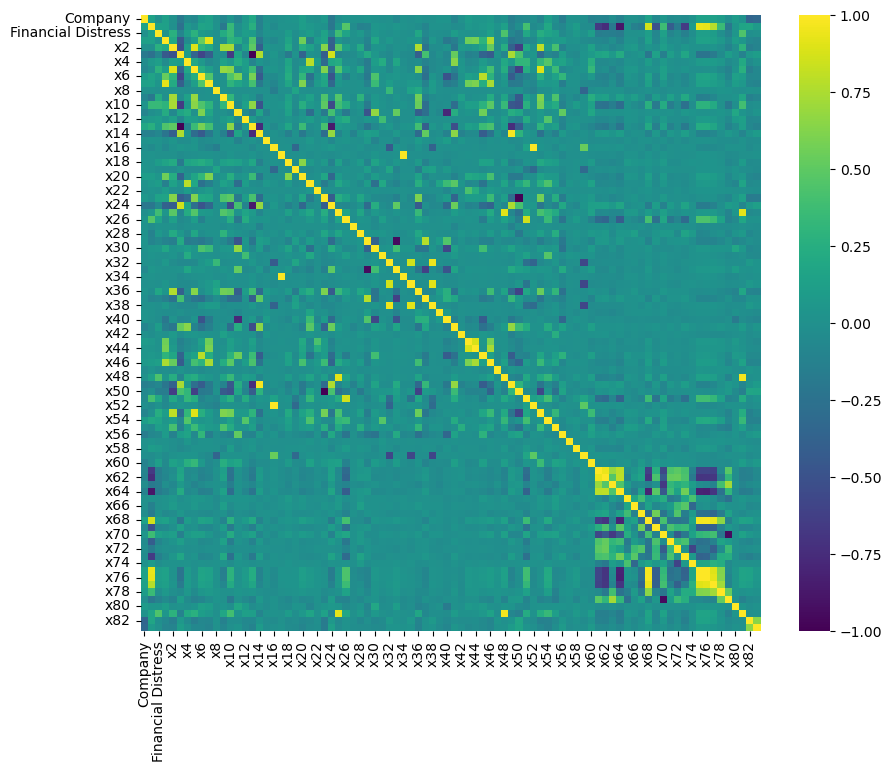

In [44]:
# the model did a terrible job , we need to improve the model performance 
corr_matrix = data.corr()


plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, cmap = 'viridis')

In [45]:
# we can see that most of the features are none correlated with the target variables 
# the best way to fix that is by performing dimension reduction to reduce the features with only the important onces

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pca = PCA(n_components= 0.90)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X = pca.fit_transform(X_scaled)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= 0.2, random_state= 42)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
y_pred_train = model.predict(x_train)

r2 = r2_score(y_test, y_pred)
r2_train = r2_score(y_train, y_pred_train)

print('the R2 score is : ', r2)
print('the R2 score is : ', r2_train)

the R2 score is :  0.4525249408396229
the R2 score is :  0.22228533915392445


In [46]:
cv_score = cross_val_score(model, X, Y, scoring='r2')

print('the cross validation score : ',cv_score)

the cross validation score :  [ 2.72950082e-01  3.56514067e-01 -1.13876133e+02  4.36101139e-02
  3.09072650e-01]


In [47]:
from sklearn.linear_model import Lasso, Ridge

model = Ridge()

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

r2 = r2_score(y_test, y_pred)

print('the R2 score is :',r2)

cv_score = cross_val_score(model, X, Y, scoring='r2')

print('the cross validation score : ',cv_score)

the R2 score is : 0.45254353126310354
the cross validation score :  [ 2.76528376e-01  3.56530380e-01 -5.61633722e+01  4.37752354e-02
  3.12758915e-01]


In [48]:
data.head()

,Company,Time,Financial Distress,x1,x2,x3,x4,x5,x6,x7,...,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83
0,1,1,0.01,1.28,0.02,0.87,1.22,0.06,0.19,0.53,...,85.44,27.07,26.10,16.00,16.0,0.2,22,0.06,30,49
1,1,2,-0.46,1.27,0.01,0.82,1.00,-0.01,0.18,0.62,...,107.09,31.31,30.19,17.00,16.0,0.4,22,0.01,31,50
2,1,3,-0.33,1.05,-0.06,0.92,0.73,0.02,0.04,0.43,...,120.87,36.07,35.27,17.00,15.0,-0.2,22,-0.46,32,51
3,1,4,-0.57,1.11,-0.02,0.86,0.81,0.08,0.09,0.68,...,54.81,39.80,38.38,17.17,16.0,5.6,22,-0.33,33,52
4,2,1,1.36,1.06,0.11,0.81,0.84,0.20,0.05,0.74,...,85.44,27.07,26.10,16.00,16.0,0.2,29,1.25,7,27


In [49]:
new_data = data.groupby('Company').mean().reset_index()

new_data.head()

,Company,Time,Financial Distress,x1,x2,x3,x4,x5,x6,x7,...,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83
0,1,2.5,-0.337500,1.177500,-0.012500,0.867500,0.940000,0.037500,0.125000,0.565000,...,92.0525,33.5625,32.485000,16.792500,15.750000,1.500000,22.0,-0.180000,31.5,50.5
1,2,7.5,1.966429,1.539286,0.205714,0.628571,0.932857,0.302857,0.252143,1.067143,...,86.8550,92.1600,89.237143,17.770714,15.142857,-2.721429,29.0,1.896429,13.5,33.5
2,3,1.0,-1.660000,0.870000,-0.030000,0.790000,0.610000,0.000000,-0.090000,0.510000,...,85.4400,27.0700,26.100000,16.000000,16.000000,0.200000,25.0,-0.300000,8.0,37.0
3,4,7.5,0.840000,1.554286,0.137143,0.462857,0.760000,0.185000,0.168571,0.472857,...,86.8550,92.1600,89.237143,17.770714,15.142857,-2.721429,12.0,0.749286,34.5,50.5
4,5,7.5,1.970000,1.127143,0.107857,0.743571,0.450714,0.109286,0.087857,0.665000,...,86.8550,92.1600,89.237143,17.770714,15.142857,-2.721429,23.0,1.922143,18.5,43.5


In [50]:
new_data =new_data.drop('Time', axis = 1)
print(new_data.shape)

(422, 85)


In [51]:
pca = PCA(n_components= 0.90)
scaler = StandardScaler()

X = new_data.drop('Financial Distress', axis = 1)
Y = new_data['Financial Distress']

X_scaled = scaler.fit_transform(X)

X = pca.fit_transform(X_scaled)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= 0.2, random_state= 42)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

r2 = r2_score(y_test, y_pred)

print('the R2 score is : ', r2)

the R2 score is :  0.7999101545442351


In [52]:
cv_score = cross_val_score(model, X, Y, scoring='r2')

print('the cross validation score : ',cv_score)
print('the mean cross validation score : ',cv_score.mean())

the cross validation score :  [0.87889496 0.57328572 0.74449311 0.85230905 0.81073006]
the mean cross validation score :  0.7719425792949475


In [55]:
model = Ridge()

cv_score = cross_val_score(model, X, Y, scoring='r2' )

print('the cross validation score : ',cv_score)
print('the mean cross validation score : ',cv_score.mean())

the cross validation score :  [0.87889496 0.57328572 0.74449311 0.85230905 0.81073006]
the mean cross validation score :  0.7719425792949475


In [64]:
# now we are performing a classification prediction for the financial distress as a target variable 

data['Financial Distress'] = (data['Financial Distress'] >= 0.5).astype(int)
data = data.drop('Time', axis = 1)
data.head()


,Company,Time,Financial Distress,x1,x2,x3,x4,x5,x6,x7,...,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83
0,1,1,0,1.28,0.02,0.87,1.22,0.06,0.19,0.53,...,85.44,27.07,26.10,16.00,16.0,0.2,22,0.06,30,49
1,1,2,0,1.27,0.01,0.82,1.00,-0.01,0.18,0.62,...,107.09,31.31,30.19,17.00,16.0,0.4,22,0.01,31,50
2,1,3,0,1.05,-0.06,0.92,0.73,0.02,0.04,0.43,...,120.87,36.07,35.27,17.00,15.0,-0.2,22,-0.46,32,51
3,1,4,0,1.11,-0.02,0.86,0.81,0.08,0.09,0.68,...,54.81,39.80,38.38,17.17,16.0,5.6,22,-0.33,33,52
4,2,1,1,1.06,0.11,0.81,0.84,0.20,0.05,0.74,...,85.44,27.07,26.10,16.00,16.0,0.2,29,1.25,7,27


In [84]:
model = RandomForestClassifier(random_state= 42)

X = data.drop('Financial Distress', axis = 1)
Y = data['Financial Distress']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= 0.2, random_state= 42)

model.fit(x_train, y_train)
y_pred = model.predict(x_test)
y_train_pred = model.predict(x_train)

accuracy = accuracy_score(y_test, y_pred)
train_accuracy = accuracy_score(y_train, y_train_pred)

print('the R2 score for the training data : ',accuracy)
print('the R2 score for the testing data : ', train_accuracy)

the R2 score for the training data :  0.8435374149659864
the R2 score for the testing data :  1.0


In [85]:
cv_score = cross_val_score(model, X, Y, scoring='accuracy')

print('the cross validation score : ', cv_score)
print('the mean cross validation score : ',cv_score.mean())

the cross validation score :  [0.82040816 0.79183673 0.80517711 0.82833787 0.76975477]
the mean cross validation score :  0.8031029305455153


In [86]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.81      0.84      0.83       326
           1       0.87      0.85      0.86       409

    accuracy                           0.84       735
   macro avg       0.84      0.84      0.84       735
weighted avg       0.84      0.84      0.84       735



<Axes: >

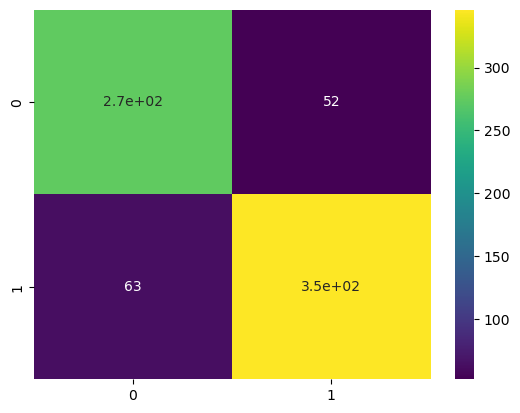

In [87]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot=True , cmap = 'viridis')

In [78]:
model = KNeighborsClassifier(n_neighbors = 10)

cv_score = cross_val_score(model, X, Y, scoring='accuracy')

print('the cross validation score : ' , cv_score)
print('the mean cross validation score : ' , cv_score.mean())


the cross validation score :  [0.79455782 0.74557823 0.70708447 0.73297003 0.73705722]
the mean cross validation score :  0.7434495542086045


In [80]:
model = LogisticRegression(max_iter=1000)

cv_score = cross_val_score(model, X, Y, scoring='accuracy')

print('the cross validation score : ' , cv_score)
print('the mean cross validation score : ' , cv_score.mean())


c:\Users\mouncef\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\mouncef\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

the cross validation score :  [0.6462585  0.65442177 0.73297003 0.72479564 0.70980926]
the mean cross validation score :  0.6936510407977907


c:\Users\mouncef\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [83]:
model = SVC(kernel='rbf')

cv_score = cross_val_score(model, X, Y, scoring='accuracy')

print('the cross validation score : ' , cv_score)
print('the mean cross validation score : ' , cv_score.mean())


the cross validation score :  [0.54693878 0.54693878 0.54632153 0.54768392 0.54768392]
the mean cross validation score :  0.5471133848634822
